In [1]:
import sys
sys.version

'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as px
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.__version__

'3.1.3'

#### Import the Dataset

Excel File:
https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx 

Sheet Name: 'Canada by Citizenship'

or

CSV File:
https://raw.githubusercontent.com/kritikseth/Datasets/master/Canada_Citizenship.csv

In [4]:
canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                      sheet_name = 'Canada by Citizenship',
                      skiprows = range(20),
                      skipfooter = 2)

In [5]:
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
canada.index, canada.index.values

(RangeIndex(start=0, stop=195, step=1),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169

In [7]:
canada.shape

(195, 43)

In [8]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

In [9]:
canada.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

#### Drop 'AREA', 'REG', 'DEV', 'Type', 'Coverage' columns

In [10]:
canada.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], inplace = True, axis = 1)

In [11]:
canada.tail(3)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59
194,Zimbabwe,Africa,Eastern Africa,Developing regions,72,114,102,44,32,29,...,1450,615,454,663,611,508,494,434,437,407


#### Rename 'OdName', 'AreaName', 'RegName' columns

In [12]:
col_map = {'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Continent-Region', 'DevName':'Development-Status'}
canada.rename(columns = col_map, inplace = True)

In [13]:
canada.head(2)

,Country,Continent,Continent-Region,Development-Status,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


#### Make a new column 'Total-Immigration' and count immigration by country for all years

In [14]:
canada['Total-Immigration'] = canada.iloc[:,4:].sum(axis = 1)
#canada['Total-Immigration'] = canada.sum(axis = 1)

In [15]:
canada.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total-Immigration
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


#### Make 'Country' the index

In [16]:
canada['Country'].value_counts().sum() / len(canada)
#to verify if each column in 'Country' is unique

1.0

In [17]:
canada.set_index(['Country'], inplace = True)

In [18]:
canada.head(2)

,Continent,Continent-Region,Development-Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total-Immigration
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


#### Print 'Continent', 'Country' and 'Total-Immigration' from the dataframe

In [19]:
canada[['Continent', 'Total-Immigration']]
#canada.iloc[:,[0,37]]
#canada.loc[:,['Continent', 'Total-Immigration']]

,Continent,Total-Immigration
Country,,
Afghanistan,Asia,58639
Albania,Europe,15699
Algeria,Africa,69439
American Samoa,Oceania,6
Andorra,Europe,15
Angola,Africa,2113
Antigua and Barbuda,Latin America and the Caribbean,981
Argentina,Latin America and the Caribbean,19596
Armenia,Asia,3310


#### Print the Immigration Statistics from India

In [20]:
canada.loc['India']

Continent                           Asia
Continent-Region           Southern Asia
Development-Status    Developing regions
1980                                8880
1981                                8670
1982                                8147
1983                                7338
1984                                5704
1985                                4211
1986                                7150
1987                               10189
1988                               11522
1989                               10343
1990                               12041
1991                               13734
1992                               13673
1993                               21496
1994                               18620
1995                               18489
1996                               23859
1997                               22268
1998                               17241
1999                               18974
2000                               28572
2001            

#### Print the Immigration Statistics from Japan in year 2000

In [21]:
canada.loc['Japan', 2000]

1010

#### Convert column names to string

In [22]:
canada.columns = list(map(str, canada.columns))
canada.columns

Index(['Continent', 'Continent-Region', 'Development-Status', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990',
       '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', 'Total-Immigration'],
      dtype='object')

#### Print the Immigration Statistics for all countries in Asia

In [23]:
canada[canada['Continent'] == 'Asia']

,Continent,Continent-Region,Development-Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total-Immigration
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


#### Print all those countries from where immigration in year 1980 was > 5000

In [24]:
canada[canada['1980'] > 5000]

,Continent,Continent-Region,Development-Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total-Immigration
Country,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122


#### Print countries from Asia  from where 'Total-Immigration'has been greater than 500000

In [25]:
canada[(canada['Continent'] == 'Asia') & (canada['Total-Immigration'] > 500000)]

,Continent,Continent-Region,Development-Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total-Immigration
Country,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391


In [26]:
years = canada.columns[3:-1]
years

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

### Line Plots

#### Plot Immigration from India over the years

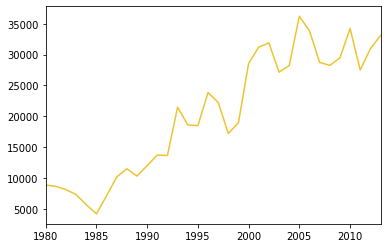

In [27]:
india = canada.loc['India',years]
india.plot(color = '#edc42d')

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

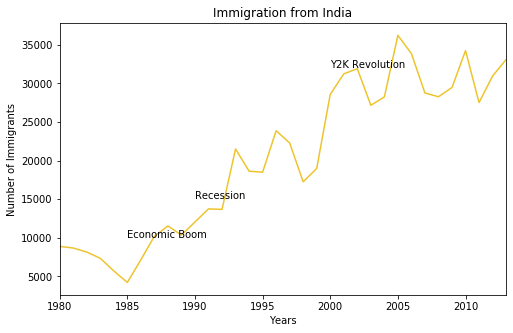

In [28]:
india.index = india.index.map(int)

india.plot(kind = 'line', color = '#edc42d', figsize = (8,5))
plt.title('Immigration from India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.text(2000, 32000, 'Y2K Revolution')
plt.text(1990, 15000, 'Recession')
plt.text(1985, 10000, 'Economic Boom')

plt.show

#### Plot a chart to compare immigration from India and China over the years

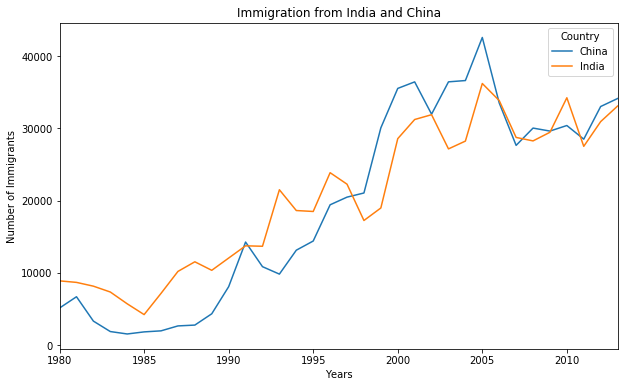

In [29]:
india_china = canada.loc[['China', 'India'], years].transpose()

india_china.plot(kind = 'line', figsize = (10,6))
plt.title('Immigration from India and China')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

#### Plot a similar graph as above for France and Germany

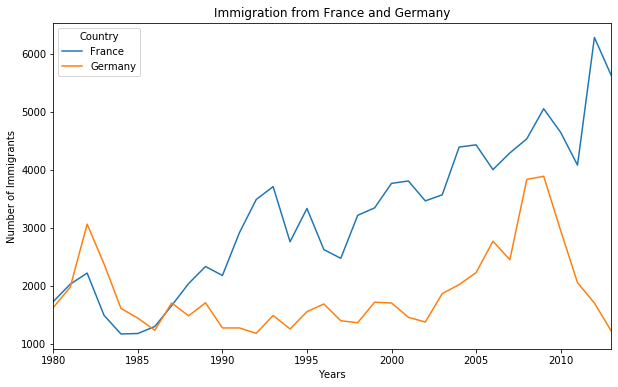

In [30]:
france_germany = canada.loc[['France', 'Germany'], years].transpose()

france_germany.plot(kind = 'line', figsize = (10,6))
plt.title('Immigration from France and Germany')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Area Plots

#### Plot a graph of Immigration from top 5 countries

In [31]:
canada.sort_values(by = 'Total-Immigration', ascending = False, inplace = True, axis = 0)
top5 = canada.head(5)[years].transpose()

_Unstacked Area Chart_

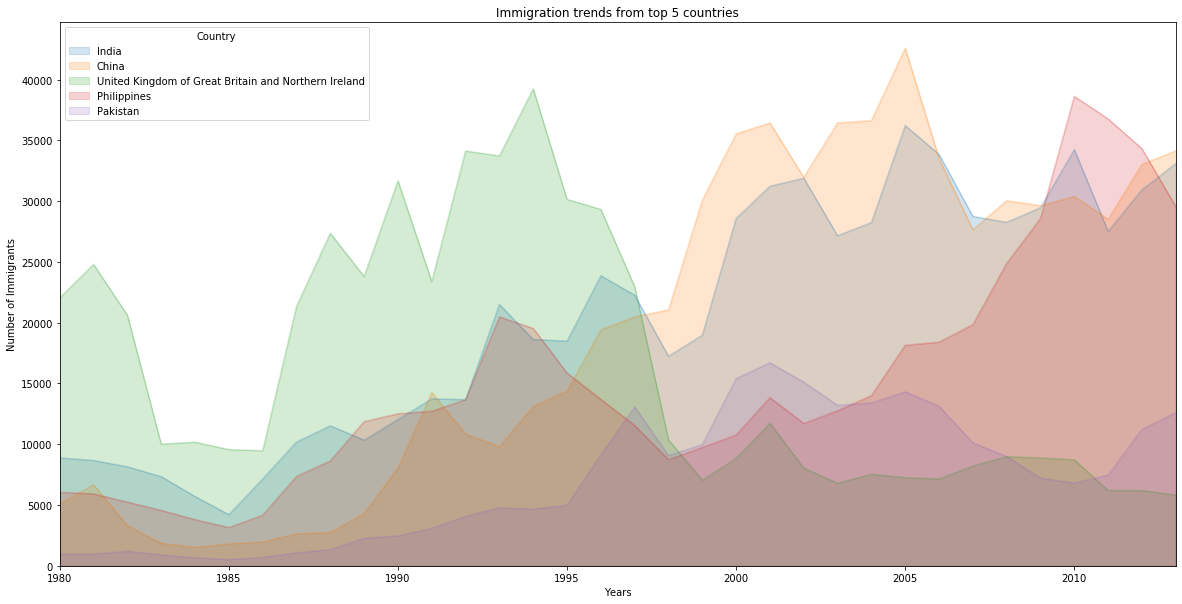

In [32]:
top5.index = top5.index.map(int)

top5.plot(kind = 'area', stacked = False, figsize = (20,10), alpha = 0.2) #alpha = transparency

plt.title('Immigration trends from top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

_Stacked Area Chart_

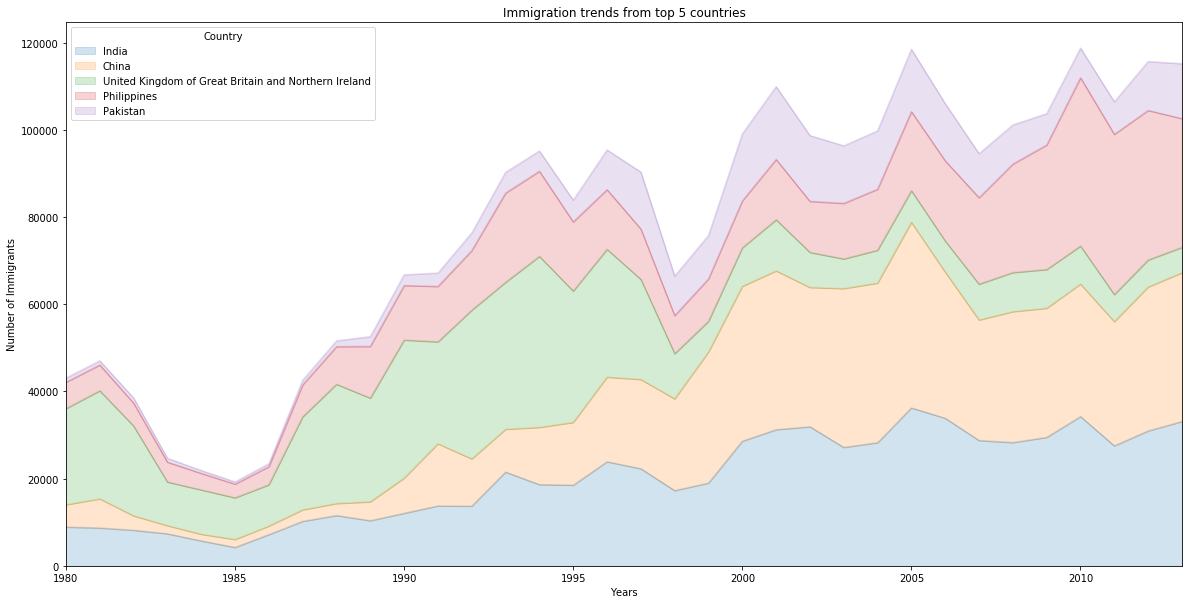

In [33]:
top5.plot(kind = 'area', stacked = True, figsize = (20,10), alpha = 0.2)

plt.title('Immigration trends from top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

#### Plot a graph of Immigration from bottom 5 countries

_Stacked_

In [34]:
bottom5 = canada.tail(5)[years].transpose()
bottom5.index = bottom5.index.map(int)

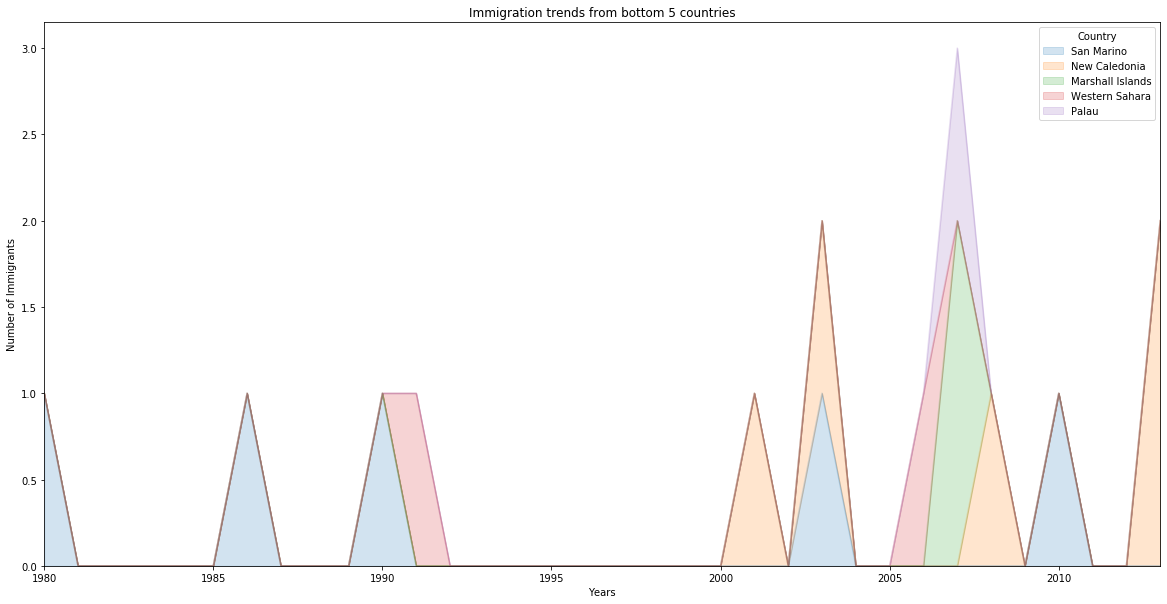

In [35]:
bottom5.plot(kind = 'area', stacked = True, figsize = (20,10), alpha= 0.2)

plt.title('Immigration trends from bottom 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Bar Plots and Histograms

#### Histogram for immigration trends in year 2000

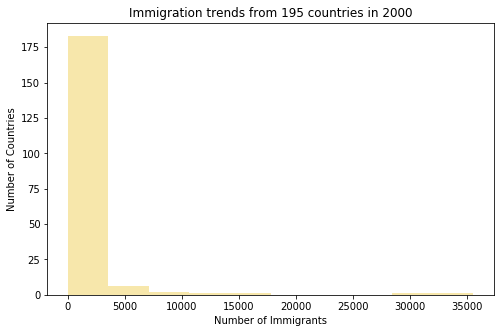

In [36]:
canada['2000'].plot(kind = 'hist', figsize = (8,5), alpha = 0.4, color = '#edc42d')

plt.title('Immigration trends from 195 countries in 2000')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()

#### Plot a histogram for the following countries
* India
* China
* Denmark
* Norway
* Germany

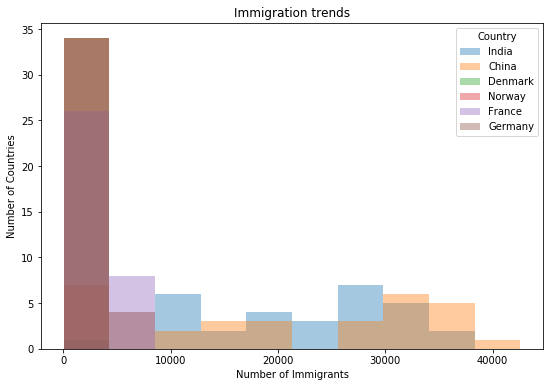

In [37]:
canada.loc[['India','China','Denmark','Norway','France','Germany'], years].transpose().plot.hist(alpha = 0.4, figsize = (9,6))

plt.title('Immigration trends')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()

#### Plot a horizontal bar plot for Immigration from India to China

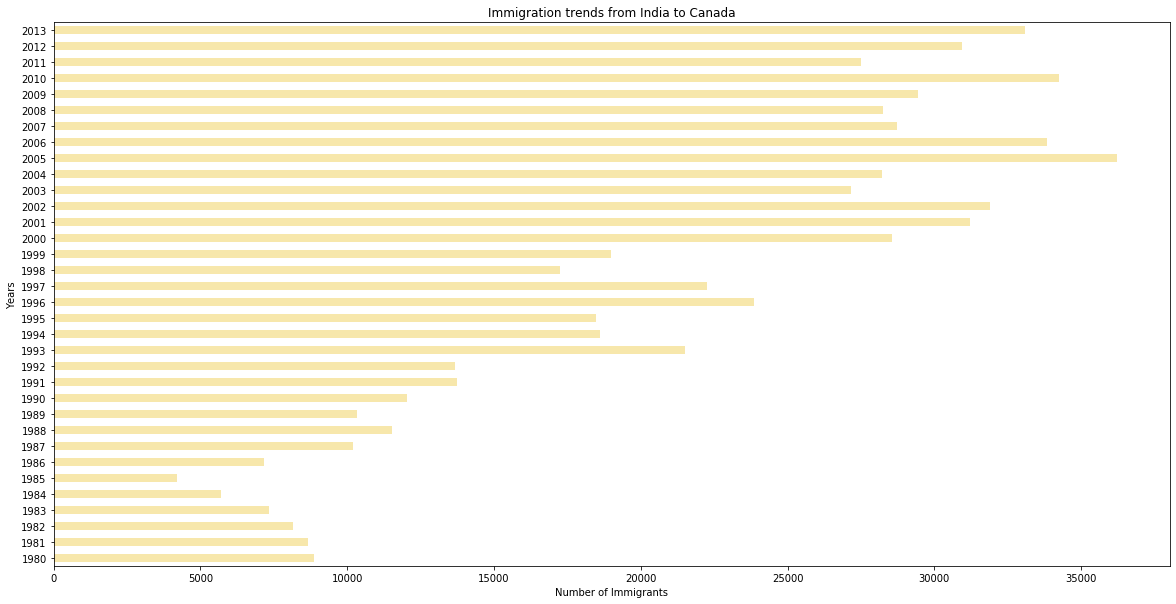

In [44]:
india.plot(kind = 'barh', figsize = (20,10), alpha = 0.4, color = '#edc42d')

plt.title('Immigration trends from India to Canada')
plt.xlabel('Number of Immigrants')
plt.ylabel('Years')

plt.show()

#### Plot a vertical bar plot for Immigration from India to China

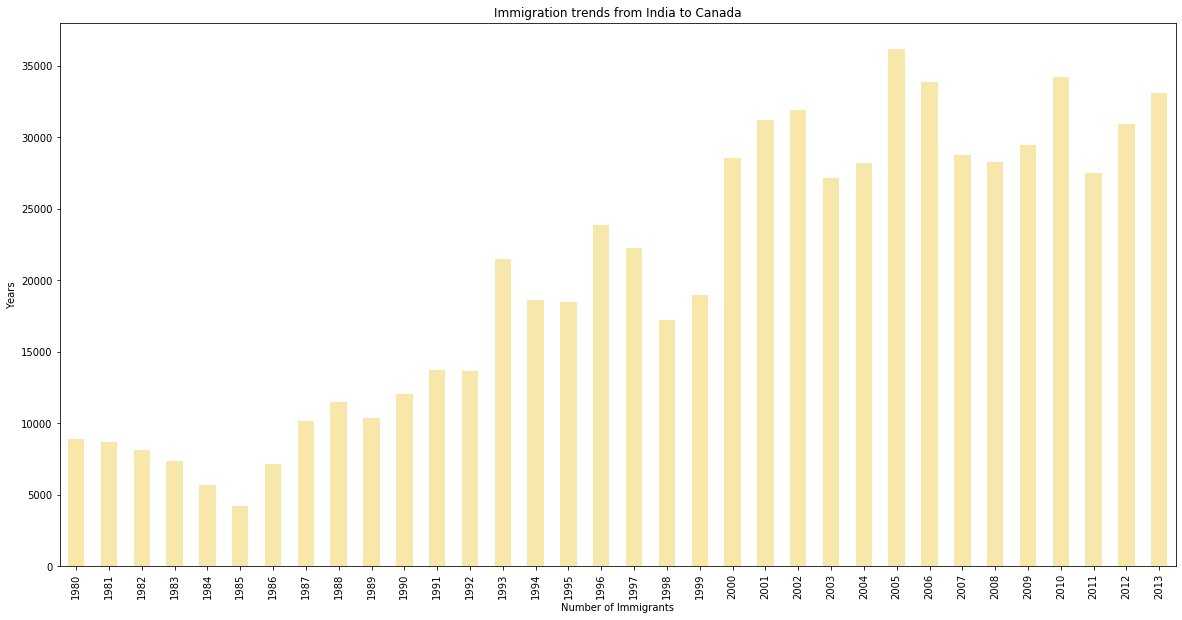

In [45]:
india.plot(kind = 'bar', figsize = (20,10), alpha = 0.4, color = '#edc42d')

plt.title('Immigration trends from India to Canada')
plt.xlabel('Number of Immigrants')
plt.ylabel('Years')

plt.show()

#### Annotate the above graph

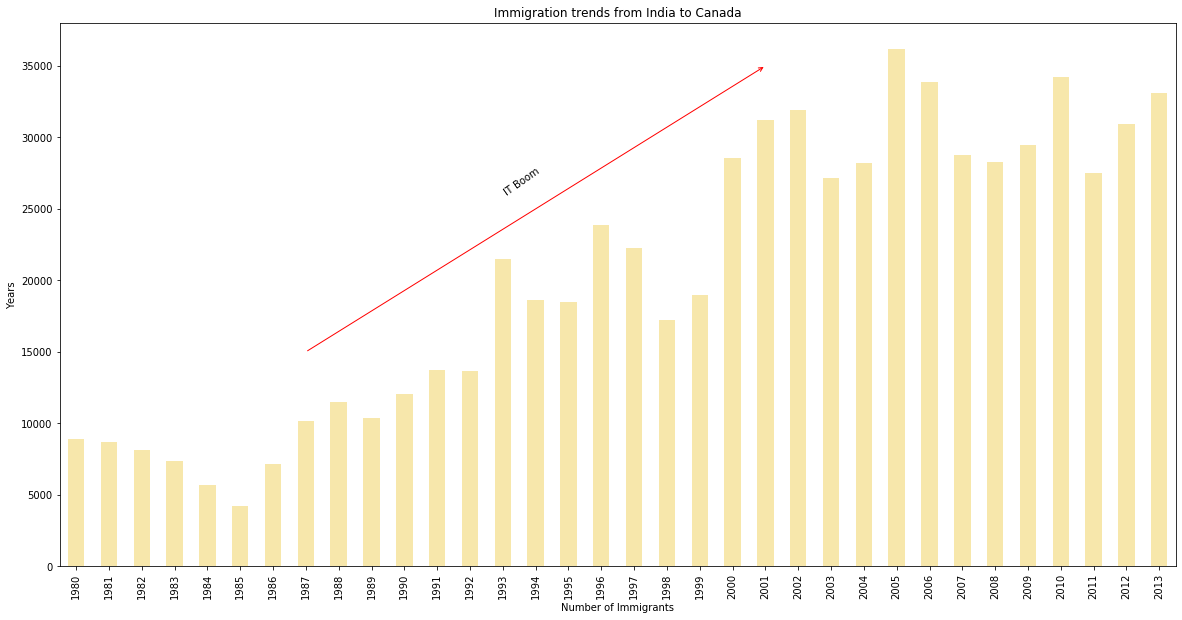

In [62]:
india.plot(kind = 'bar', figsize = (20,10), alpha = 0.4, color = '#edc42d')

plt.title('Immigration trends from India to Canada')
plt.xlabel('Number of Immigrants')
plt.ylabel('Years')

plt.annotate('', #arrow title
            xy = (21,35000), #x,y (co-ordinates) of arrow head
            xytext = (7,15000), #x,y (co-ordinates) of arrow tail
            xycoords = 'data', #keep unchanged ##the co-ordinated system xy is given in
            arrowprops = dict(arrowstyle = '->', color = 'red')
           )
plt.annotate('IT Boom', #text
            xy = (13,28000), #x,y (co-ordinates) of text
            rotation = 35, #counter clockwise rotation of text
            xycoords = 'data', #keep unchanged ##the co-ordinated system xy is given in
            va='top', #position text 
            ha='left' #position text
           )

plt.show()